# Build an Artificial Neural Network

## Classifying Dates

In this project we will build a neural network to classify dates. For this we'll use "Date Fruit Dataset" available on Kaggle. This dataset includes samples of dates that can be classified into 7 classes according to their types.

# Importing the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

# Dataset

In [ ]:
data = pd.read_excel('/content/date_fruit.xlsx')

In [ ]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [ ]:
data.shape, data['Class'].unique()

((898, 35),
 array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
       dtype=object))

# Preprocessing

In [ ]:
X = data.drop('Class',axis=1)
y = data.loc[:,'Class']

# Feature Scaling
Having feature in different units or ranges can be problematic in deep learning. We need to scale all of the values between 0 and 1 range


In [ ]:
# Normalize the features dataset and assign it to a variable.
X_scaled = minmax_scale(X)

# Create a dataframe using the new variable.
X = pd.DataFrame(X_scaled)

In [ ]:
# Print the new dataframe
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128


# Encoding

In [ ]:
# Create a Label Encoder object
encoder = LabelEncoder()

# Convert sting classes to integers using fit_transform() method
y = encoder.fit_transform(y)

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

# Splitting
We now split the dataset into training, validation and test datasets. In general, the ration for splitting is 80% for training, 10% for validation and 10% for test sets.

# Use train_test_split function of the sklearn library

In [ ]:
# First create X_train, y_train and X_temporary and y_temporary datasets from X and Y.
X_train, X_temporary, y_train, y_temporary = train_test_split(X,y, train_size = 0.8)

# Using the X_temporary and y_temporary dataset we just created create validation and test datasets
X_val, X_test, y_val, y_test = train_test_split(X_temporary,y_temporary,train_size = 0.5)

In [ ]:
# Print the lengths of the X, X_train, X_val and X_test
print(f"Length of the dataset: {len(X)}")
print(f"Length of the training dataset: {len(X_train)}")
print(f"Length of the validation dataset: {len(X_val)}")
print(f"Length of the test dataset: {len(X_test)}")

Length of the dataset: 898
Length of the training dataset: 718
Length of the validation dataset: 90
Length of the test dataset: 90


# Construnctig the neural network
Our data is ready to be used in a model. We can move on to the exciting part: Constructiong a deep learning model. We'll use Tensorflow. To speed up the training time activate GPU of Google Colab

In [ ]:
import tensorflow as tf

Let's start by creating a model object using Sequential API of Keras

Use tf.kreas.Sequential() to crete a model object

In [ ]:
model = tf.keras.Sequential()

In [ ]:
# create an input layer
input_layer = tf.keras.layers.Dense(4096, input_shape=(34,), activation='relu')

# add input layer to the model
model.add(input_layer)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Hidden layers
we need to add the hidden layers, We'll add 4 hidden layers each with 4096 nodes. Again we specify ReLu activation functions and 0.5 dropouts.

Use tf.keras.layes.Dense() to create the layers
Use .add method() of the object to add the layer.

In [ ]:
# Add the first hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096,activation='relu'))
# add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the second hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096,activation='relu'))
# add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the third hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096,activation='relu'))
# add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the fourth hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096,activation='relu'))
# add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Output layer
As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 7 in our case. We'll use the softmax activation function in the output layer.

In [ ]:
model.add(tf.keras.layers.Dense(7, activation='softmax'))

# Optimizer

Now we have the structure of our model. To configure the model for training we'll use the .compile() method. Inside the compile we have to define the following:


*   "Adam" for optimizer
*   "Sparse Categorical CrossEntropy" for the loss function

Construnct the model with the .compile() method



In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the validation_data parameters we'll give the X_val and y_val as a tuple

Use .fit() method of the model object for the training.

In [ ]:
results = model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_val,y_val))

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8856 - loss: 0.2903 - val_accuracy: 0.9000 - val_loss: 0.2767
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9328 - loss: 0.2140 - val_accuracy: 0.8556 - val_loss: 0.4703
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8965 - loss: 0.2943 - val_accuracy: 0.9111 - val_loss: 0.3033
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9235 - loss: 0.2464 - val_accuracy: 0.9111 - val_loss: 0.2560
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9137 - loss: 0.2800 - val_accuracy: 0.9000 - val_loss: 0.2631
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9226 - loss: 0.2150 - val_accuracy: 0.9111 - val_loss: 0.3965
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9310 - loss: 0.2743 - val_accuracy: 0.9333 - val_loss: 0.1940
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9169 - loss: 0.3138 - val_accuracy: 0.9333 - v

# Visualize the results

After the model is trained we can create a graph to visualize the change of loss over time. Results are held in:
  results.history['loss']
  results.histor['val_loss']

Use plt.show() to display the graph

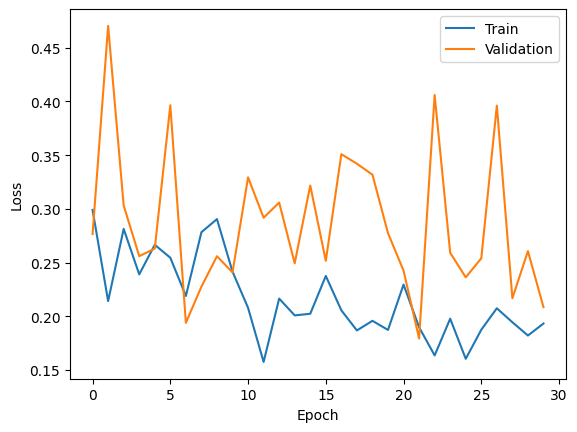

In [ ]:
# Plot the training loss
plt.plot(results.history['loss'],label='Train')
# Plot the validation loss
plt.plot(results.history['val_loss'],label='Validation')

# Name the X and Y axis
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Put legend table
plt.legend()
# Show the plot
plt.show()


# Performance Evaluation

Finally, we are going to use the test dataset we created to evaluate the performance of the model.

Use test_on_batch() method with test dataset as parameter

In [ ]:
# Evaluate the performance
test_result = model.test_on_batch(X_test, y_test)

# Print the result
print(f"Loss:{test_result[0]}, Accuracy:{test_result[1]}")

Loss:0.17740866541862488, Accuracy:0.9222222566604614
